In [1]:
from sympy import *
import matplotlib.pyplot as plt
from sympy import init_printing
init_printing()

In [2]:
t, k = symbols('t k');

In [3]:
A = 4
T = 10 * 10**-3
N = 5

In [4]:
s = Piecewise(
    (A, Or(And(t>=0, t<T/4), And(t>3*T/4, t<T))),
    (-A, And(t>T/4, t<3*T/4)),
    (0, True)
)

In [5]:
import numpy as np

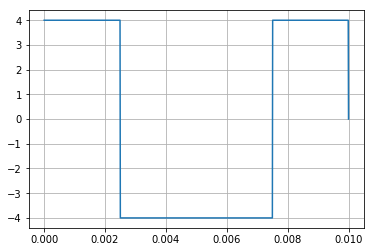

In [6]:
fs = lambdify(t, s, 'numpy')
x = np.linspace(0, T, 1000)
plt.plot(x, fs(x))
plt.grid(True)

In [7]:
S = 2*integrate(s * exp(-1j*(2*pi)/T*k*t), (t, 0, T))/T

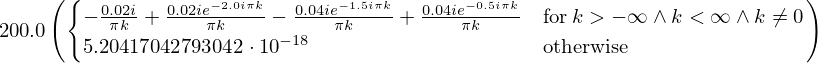

In [8]:
S

In [9]:
w = 2*pi/T*k

In [34]:
spectrum = np.zeros((3, N))
for i in range(0,N):
    spectrum[0, i] = w.subs(k, i).evalf()
    harmonic = complex(S.subs(k, i).evalf())
    harmonic = round(harmonic.real, 4) + round(harmonic.imag, 4) * 1j
    spectrum[1, i] = np.abs(harmonic)
    spectrum[2, i] = np.angle(harmonic, deg=True)

Text(0.5, 0, 'Честота [rad/s]')

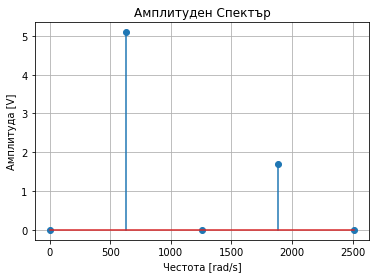

In [35]:
plt.stem(spectrum[0],spectrum[1])
plt.grid(True)
plt.title("Амплитуден Спектър")
plt.ylabel("Амплитуда [V]")
plt.xlabel("Честота [rad/s]")

Text(0.5, 0, 'Честота [rad/s]')

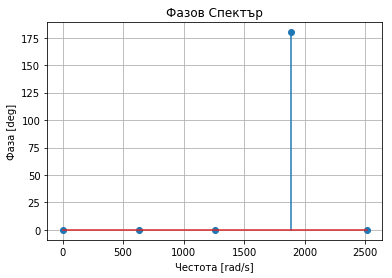

In [36]:
plt.stem(spectrum[0],spectrum[2])
plt.grid(True)
plt.title("Фазов Спектър")
plt.ylabel("Фаза [deg]")
plt.xlabel("Честота [rad/s]")

In [37]:
a=0
for i in np.transpose(spectrum):
    print("Harminic #%d: Amplitude:%.4f Phase: %.4f" % (a, i[1], i[2]))
    a=a+1

Harminic #0: Amplitude:0.0000 Phase: 0.0000
Harminic #1: Amplitude:5.0930 Phase: 0.0000
Harminic #2: Amplitude:0.0000 Phase: 0.0000
Harminic #3: Amplitude:1.6977 Phase: 180.0000
Harminic #4: Amplitude:0.0000 Phase: 0.0000


In [40]:
harmonic = complex(S.subs(k, 1).evalf())
#harmonic = round(harmonic.real, 2) + round(harmonic.imag, 2) * 1j
print (harmonic)

(5.092958178940651-1.6940658945086007e-21j)


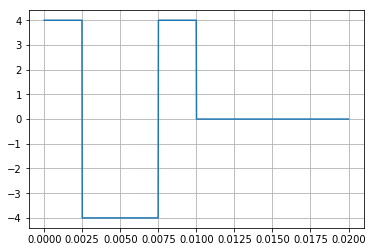

In [52]:
fs = lambdify(t, s.subs(t,t+0), 'numpy')
x = np.linspace(0, 2*T, 1000)
plt.plot(x, fs(x))
plt.grid(True)

In [53]:
t0 = symbols('t0')
sCopy=s.subs(t,t+t0)
corr = integrate(s*sCopy, (t, 0, T))

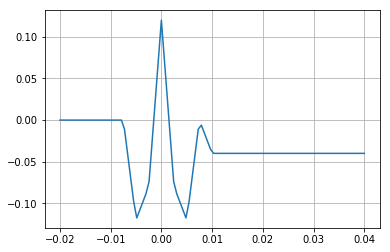

In [65]:
x = np.linspace(-2*T, 4*T, 100)
y = np.zeros_like(x)
for i in range(0,len(x)):
    y[i] = float(corr.subs(t0, x[i]))
plt.plot(x, y)
plt.grid(True)

In [55]:
corr

In [58]:
corr.subs(t0, 2)